<a href="https://colab.research.google.com/github/qtren/linearregression/blob/main/linearRegressionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
dt = pd.read_csv('kc_house_data.csv')
# Check data
dt

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


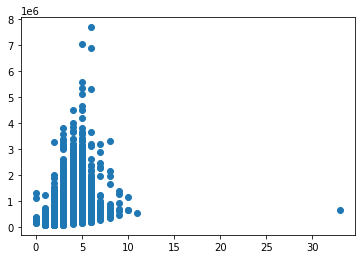

In [50]:
# Initial Observations
# Price vs Bedrooms

price = dt['price']
bedrooms = dt['bedrooms']
plt.scatter(bedrooms, price)
plt.show()

In [51]:
# We found an outlier. It will be a better idea to remove it
dt = dt[dt['bedrooms']<15]

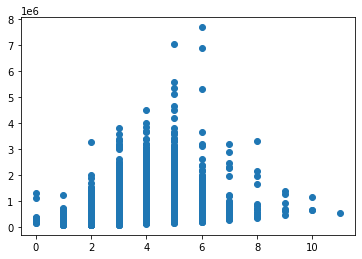

In [52]:
# Try this again
# Price vs Bedrooms

price = dt['price']
bedrooms = dt['bedrooms']
plt.scatter(bedrooms, price)
plt.show()

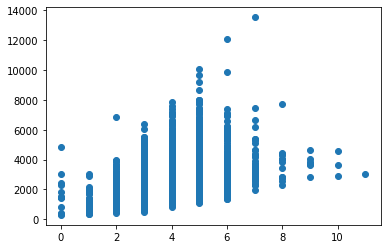

In [53]:
# price vs sqft_living
price = dt['price']
sqft_living = dt['sqft_living']
plt.scatter(bedrooms, sqft_living)
plt.show()

In [30]:
# We can see some coorelation. Instead of checking price vs some_variable one by one
# We can use the correlation matrix.

In [31]:
# I dropped the date column because the data is not properly formatted
# Moreover, even if we have date values like 20151004, it doesn't mean the same
# as the integer 20151004. It means a date. House prices varies according to date
# because of economic conditions, but treating 20151004 as an integer will only
# confuse the model. The model is not going to know we mean a date instead of an int. 

# Zip code won't matter either, because again zip code is discontinuously distributed
# and unsuitable for linear regression models.

In [54]:
# Choose the most relevant data by human experience
dt = dt [['price', 'bedrooms', 'bathrooms' , 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',\
          'grade', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']]
# Check correlation matrix
dt.corr()

# Surprisingly condition doesn't have a strong effect on price
# For this data set, condition varies from 1 to 5, with 5 being the worst condition

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.315445,0.525147,0.702047,0.089664,0.256811,0.266371,0.036336,0.667447,0.605591,0.054023,0.585404,0.082451
bedrooms,0.315445,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.025478,0.366502,0.490600,0.159167,0.402626,0.030402
bathrooms,0.525147,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,-0.124946,0.664979,0.685339,0.506012,0.568628,0.087170
sqft_living,0.702047,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,-0.058704,0.762701,0.876597,0.318037,0.756419,0.183280
sqft_lot,0.089664,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,-0.008935,0.113616,0.183507,0.053073,0.144602,0.718556
floors,0.256811,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,-0.263706,0.458171,0.523866,0.489302,0.279856,-0.011282
waterfront,0.266371,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.016665,0.082773,0.072072,-0.026165,0.086461,0.030702
condition,0.036336,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,1.000000,-0.144632,-0.158136,-0.361380,-0.092731,-0.003373
grade,0.667447,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,-0.144632,1.000000,0.755919,0.446952,0.713198,0.119241
sqft_above,0.605591,0.490600,0.685339,0.876597,0.183507,0.523866,0.072072,-0.158136,0.755919,1.000000,0.423879,0.731860,0.194042


In [55]:
# Choose a even more relevant subset according to corr
# lot should still be considered
# set up X and y
X = dt[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot' , 'floors', 'waterfront', 'grade', 'sqft_above', 'sqft_living15']]
y = dt['price']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
# Linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([-3.97303820e+04, -1.39001086e+04,  2.51757630e+02, -3.20710113e-01,
       -1.52940171e+04,  7.60947947e+05,  1.02255237e+05, -6.43302686e+01,
        1.67961172e+01])

In [72]:
predicted_price = reg.predict(X_test)
actual_price = y_test
a = [i for i in range(len(y_test))]

output = {'No.':a ,"Actual Price": actual_price, "Predicted Price": predicted_price, 'Difference': predicted_price - actual_price}
df2 = pd.DataFrame.from_dict(output)
df2

,No.,Actual Price,Predicted Price,Difference
735,0,365000.0,5.223986e+05,1.573986e+05
2830,1,865000.0,7.122930e+05,-1.527070e+05
4106,2,1038000.0,1.165845e+06,1.278453e+05
16219,3,590000.0,6.685056e+05,7.850556e+04
20879,4,352800.0,4.613336e+05,1.085336e+05
...,...,...,...,...
21071,5398,1080000.0,6.261482e+05,-4.538518e+05
11144,5399,650000.0,7.606306e+05,1.106306e+05
17804,5400,550000.0,7.577362e+05,2.077362e+05
268,5401,272500.0,6.100649e+05,3.375649e+05


In [58]:
df2.to_excel('house_price_prediction_model.xls')

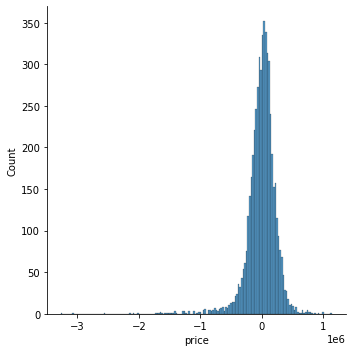

In [70]:
difference = predicted_price - actual_price
sns.displot(difference )

In [ ]:
# To view the result of this model using Tableau, click this link
# https://public.tableau.com/shared/NCCPKBXCG?:display_count=n&:origin=viz_share_link

# Conclusion: this is not a good model. There might be some other important factors that we forget to consider.
# Some relations might not be linear. We should try with some other model.

# Two important factors that were not considered: house price vs time, and geographic location.
# This is mostly because of linear regression cannot capture those factors well. (In general, price doesn't
# scale linearly with respect to longitude or latitude.)